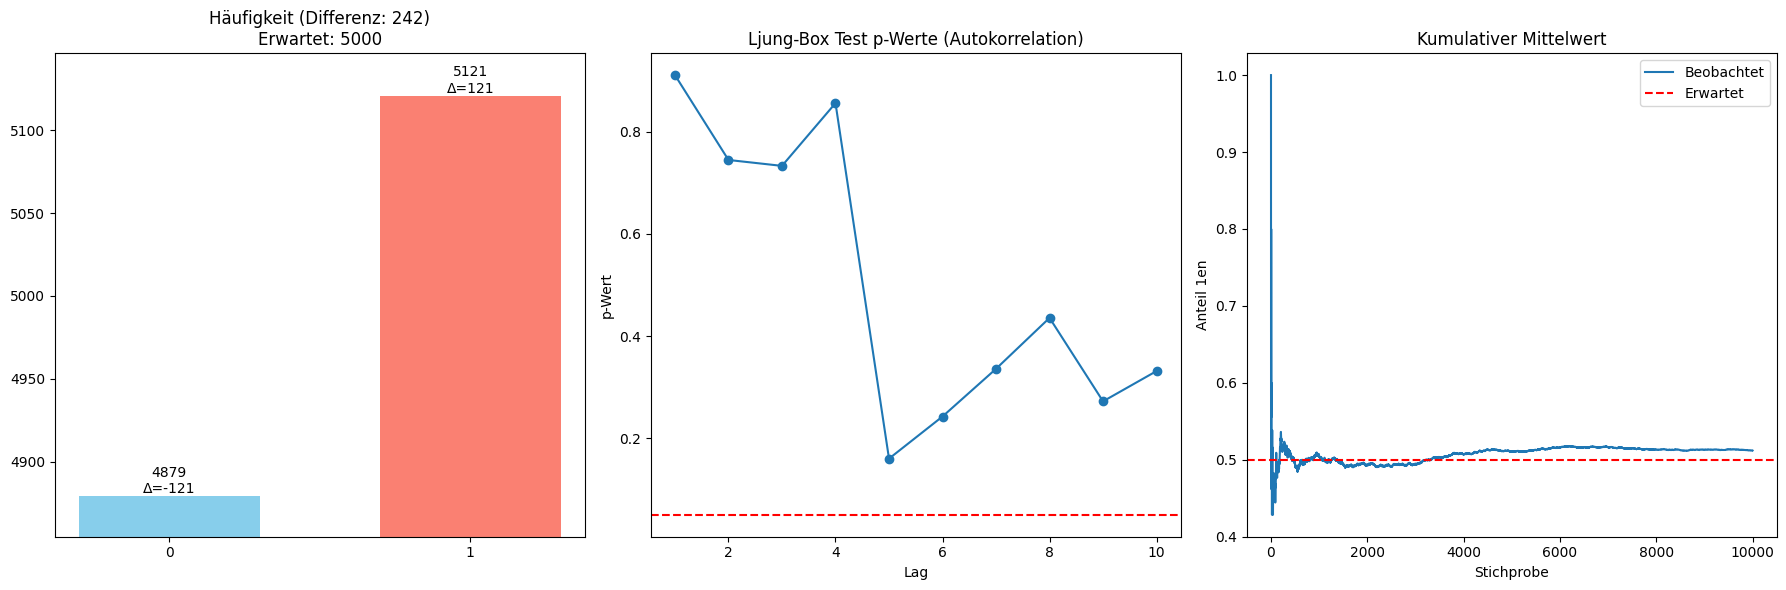


Wissenschaftliche Bewertung der Zufälligkeit:
                       Test   p-Wert          Ergebnis
        Runs-Test (Ordnung) 0.903285 Nicht signifikant
  Binomialtest (Verteilung) 0.015948       Signifikant
           Chi-Quadrat-Test 0.015521       Signifikant
Ljung-Box (Autokorrelation) 0.502336 Nicht signifikant
         Kolmogorov-Smirnov 0.500000 Nicht signifikant

FAZIT: Die Daten zeigen signifikante Abweichungen von echter Zufälligkeit (p < 0.05)


In [16]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.sandbox.stats.runs import runstest_1samp
from statsmodels.stats.diagnostic import acorr_ljungbox
import pandas as pd

# 10.000 Zufallswerte (0 oder 1)
n = 10000
results = [random.randint(0, 1) for _ in range(n)]
results_float = [float(x) for x in results]  # Für einige Tests benötigt

# 1. Deskriptive Statistik
count_0 = results.count(0)
count_1 = results.count(1)
prop_0 = count_0 / n
prop_1 = count_1 / n

# 2. Statistische Tests für Zufälligkeit
# a) Runs-Test auf Zufälligkeit der Reihenfolge
z_stat_runs, p_value_runs = runstest_1samp(results, correction=False)

# b) Binomialtest auf faire Verteilung (50:50) - KORREKTE VERSION
binom_result = stats.binomtest(count_0, n=n, p=0.5)
p_value_binom = binom_result.pvalue

# c) Chi-Quadrat-Anpassungstest
chi2, p_value_chi2 = stats.chisquare([count_0, count_1], f_exp=[n/2, n/2])

# d) Ljung-Box-Test auf Autokorrelation (für 10 lags)
lb_test = acorr_ljungbox(results_float, lags=10, return_df=True)
p_value_lb = lb_test['lb_pvalue'].mean()  # Durchschnittlicher p-Wert

# e) Kolmogorov-Smirnov-Test gegen gleichverteilte kumulative Verteilung
unique, counts = np.unique(results, return_counts=True)
cdf = np.cumsum(counts)/n
ks_stat, p_value_ks = stats.kstest(cdf, 'uniform')

# 3. Erweiterte Visualisierung
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Balkendiagramm mit Differenz-Fokus
bars = ax1.bar(['0', '1'], [count_0, count_1], color=['skyblue', 'salmon'], width=0.6)
ax1.set_title(f'Häufigkeit (Differenz: {abs(count_0-count_1)})\nErwartet: {n/2:.0f}')
ax1.set_ylim(min(count_0, count_1)*0.995, max(count_0, count_1)*1.005)
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height, 
             f'{height}\nΔ={height-n/2:.0f}', ha='center', va='bottom')

# Ljung-Box Test Ergebnisse
ax2.plot(lb_test['lb_pvalue'], 'o-')
ax2.axhline(0.05, color='red', linestyle='--')
ax2.set_title('Ljung-Box Test p-Werte (Autokorrelation)')
ax2.set_xlabel('Lag')
ax2.set_ylabel('p-Wert')

# Kumulative Verteilung
ax3.plot(np.cumsum(results)/np.arange(1,n+1), label='Beobachtet')
ax3.axhline(0.5, color='red', linestyle='--', label='Erwartet')
ax3.set_title('Kumulativer Mittelwert')
ax3.set_xlabel('Stichprobe')
ax3.set_ylabel('Anteil 1en')
ax3.legend()

plt.tight_layout()
plt.show()

# 4. Wissenschaftliche Bewertung der Zufälligkeit
test_results = {
    'Test': ['Runs-Test (Ordnung)', 'Binomialtest (Verteilung)', 
             'Chi-Quadrat-Test', 'Ljung-Box (Autokorrelation)', 
             'Kolmogorov-Smirnov'],
    'p-Wert': [p_value_runs, p_value_binom, p_value_chi2, p_value_lb, p_value_ks],
    'Ergebnis': ['Nicht signifikant' if p >= 0.05 else 'Signifikant' 
                 for p in [p_value_runs, p_value_binom, p_value_chi2, p_value_lb, p_value_ks]]
}

results_df = pd.DataFrame(test_results)
print("\nWissenschaftliche Bewertung der Zufälligkeit:")
print(results_df.to_string(index=False))

# Gesamtbewertung
if any(p < 0.05 for p in [p_value_runs, p_value_binom, p_value_chi2, p_value_lb, p_value_ks]):
    print("\nFAZIT: Die Daten zeigen signifikante Abweichungen von echter Zufälligkeit (p < 0.05)")
else:
    print("\nFAZIT: Die Daten zeigen keine signifikanten Abweichungen von echter Zufälligkeit (p ≥ 0.05)")

In [12]:
significant_counts = {'Runs': 0, 'Binomial': 0, 'Chi2': 0, 'Ljung-Box': 0, 'KS': 0}

for _ in range(100):
    results = [random.randint(0, 1) for _ in range(10000)]
    count_0 = results.count(0)
    
    # Tests durchführen (vereinfacht)
    _, p_runs = runstest_1samp(results, correction=False)
    p_binom = stats.binomtest(count_0, n=10000, p=0.5).pvalue
    _, p_chi2 = stats.chisquare([count_0, 10000-count_0], f_exp=[5000, 5000])
    
    if p_runs < 0.05: significant_counts['Runs'] += 1
    if p_binom < 0.05: significant_counts['Binomial'] += 1
    if p_chi2 < 0.05: significant_counts['Chi2'] += 1

print("Anzahl signifikanter Ergebnisse (von 100):")
print(significant_counts)

Anzahl signifikanter Ergebnisse (von 100):
{'Runs': 4, 'Binomial': 2, 'Chi2': 2, 'Ljung-Box': 0, 'KS': 0}
